In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from Ising import Lattice

# Relaxation times

MemoryError: In RendererAgg: Out of memory

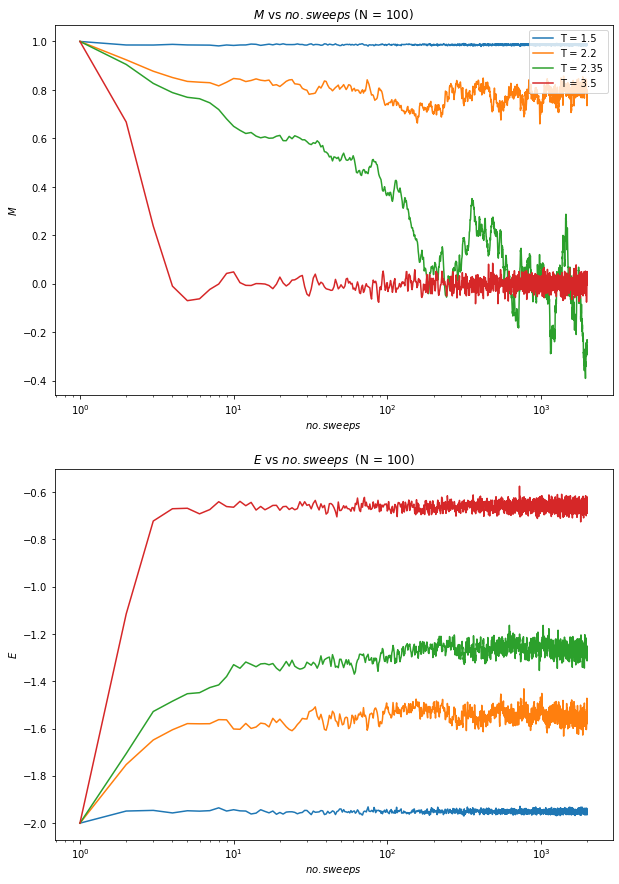

In [55]:
l = Lattice(100)
n = 2000
Ts = [1.5, 2.2, 2.35, 3.5]

fig, ax = plt.subplots(2)
for T in Ts:
    l.align()
    Es, Ms = l.stats_equ(n, T, H=0)
    ax[0].plot(range(1, n+1), Ms)
    ax[1].plot(range(1, n+1), Es)

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].set_xlabel("$no. sweeps$"), ax[1].set_xlabel("$no. sweeps$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$E$")
ax[0].set_title("$M$ vs $no. sweeps$ (N = 100)"), ax[1].set_title("$E$ vs $no. sweeps$  (N = 100)")
ax[0].legend(["T = " + str(T) for T in Ts], loc='upper right')
fig.set_size_inches(10, 15)
plt.savefig("./pics/equ_time_M=1.png", format="png", dpi=1200, bbox_inches='tight')

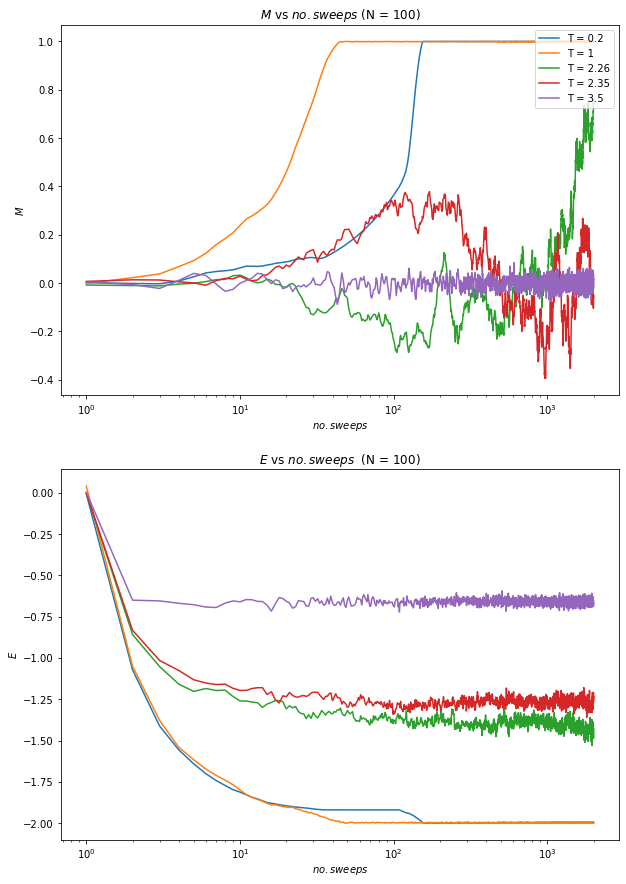

In [60]:
l = Lattice(100)
n = 2000
Ts = [0.2, 1, 2.26, 2.35, 3.5]

fig, ax = plt.subplots(2)
for T in Ts:
    l.random()
    Es, Ms = l.stats_equ(n, T, H=0)
    ax[0].plot(range(1, n+1), Ms)
    ax[1].plot(range(1, n+1), Es)

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].set_xlabel("$no. sweeps$"), ax[1].set_xlabel("$no. sweeps$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$E$")
ax[0].set_title("$M$ vs $no. sweeps$ (N = 100)"), ax[1].set_title("$E$ vs $no. sweeps$  (N = 100)")
ax[0].legend(["T = " + str(T) for T in Ts], loc='upper right')
fig.set_size_inches(10, 15)
plt.savefig("./pics/equ_time_M=0.png", format="png", dpi=1200, bbox_inches='tight')

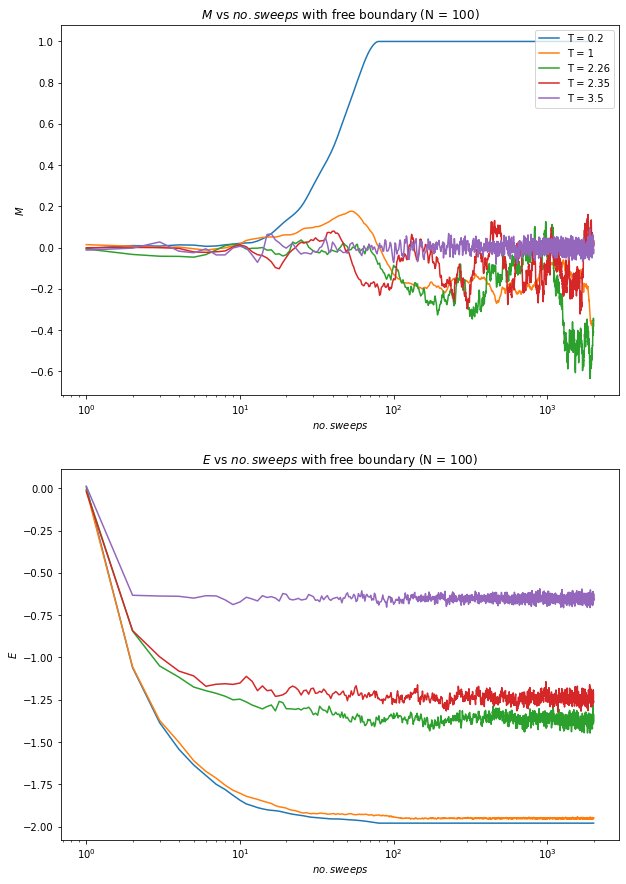

In [63]:
l = Lattice(100, free_bound=True)
n = 2000
Ts = [0.2, 1, 2.26, 2.35, 3.5]

fig, ax = plt.subplots(2)
for T in Ts:
    l.random()
    Es, Ms = l.stats_equ(n, T, H=0)
    ax[0].plot(range(1, n+1), Ms)
    ax[1].plot(range(1, n+1), Es)

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].set_xlabel("$no. sweeps$"), ax[1].set_xlabel("$no. sweeps$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$E$")
ax[0].set_title("$M$ vs $no. sweeps$ with free boundary (N = 100)"), ax[1].set_title("$E$ vs $no. sweeps$ with free boundary (N = 100)")
ax[0].legend(["T = " + str(T) for T in Ts], loc='upper right')
fig.set_size_inches(10, 15)
plt.savefig("./pics/equ_time_M=0_free.png", format="png", dpi=1200, bbox_inches='tight')

# Equilibrium plots

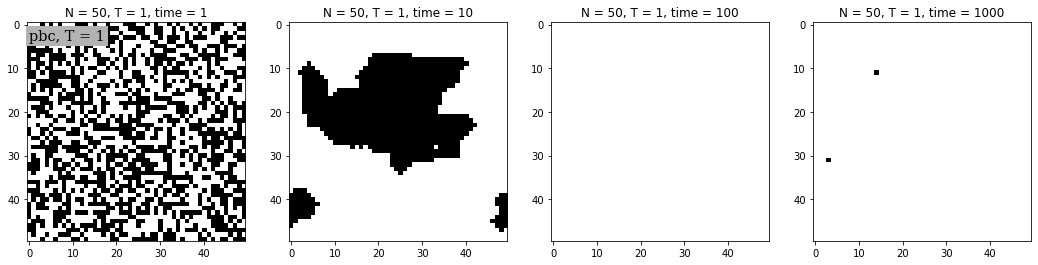

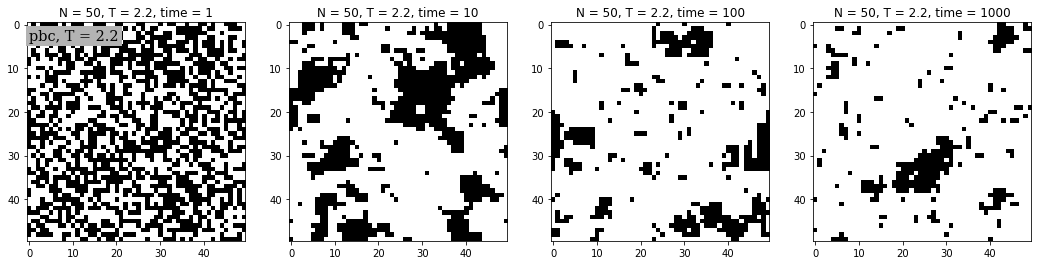

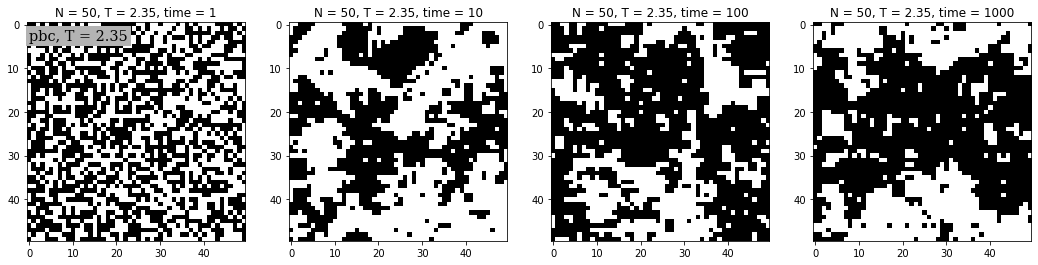

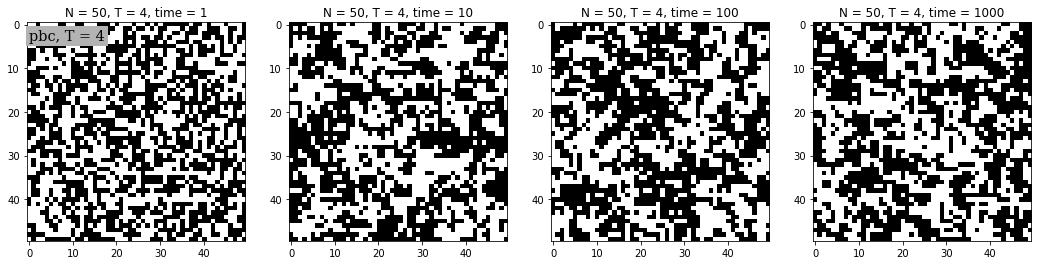

In [76]:
K = 1
N = 50
l = Lattice(N, K=K, d=2, free_bound=False)
n = 1000
n_steps = 4
n_show = np.geomspace(1, n, n_steps)-1

Ts = [1, 2.2, 2.35, 4]
T = 2.26


for T in Ts:
    l.random()
    fig, ax = plt.subplots(1, n_steps)
    fig.set_size_inches(18, 5)
    ax[0].text(0.0, 1.0, "pbc, " + f'{T = }',  fontsize='x-large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
    for i in range(n):
        for j in range(len(n_show)):
            if i == int(n_show[j]):
                ax[j].imshow(l.lat[0], cmap='binary')
                ax[j].set_title(f'{N = }, ' + f'{T = }, '+'time = ' + str(i+1))
        l.update(T)
    fig.savefig('pics/equ_plot'+str(T)+".png", format="png", dpi=1200, bbox_inches='tight')

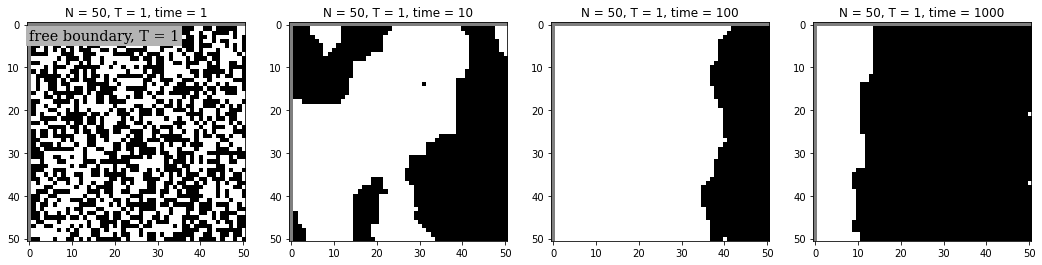

In [72]:
K = 1
N = 50
l = Lattice(N, K=K, d=2, free_bound=True)
n = 1000
n_steps = 4
n_show = np.geomspace(1, n, n_steps)-1

T = 1

l.random()
fig, ax = plt.subplots(1, n_steps)
fig.set_size_inches(18, 5)
ax[0].text(0.0, 1.0, "free boundary, "+f'{T = }',  fontsize='x-large', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
for i in range(n):
    for j in range(len(n_show)):
        if i == int(n_show[j]):
            ax[j].imshow(l.lat[0], cmap='binary')
            ax[j].set_title(f'{N = }, ' + f'{T = }, '+'time = ' + str(i+1))
    l.update(T)
fig.savefig('pics/equ_plot'+str(T)+"_free.png", format="png", dpi=1200, bbox_inches='tight')